In [1]:
display(HTML("<style>.rendered_html.text_cell_render {max-width:700px; }</style>"));

HTML{String}("<style>.rendered_html.text_cell_render {max-width:700px; }</style>")

# Pushing forward a multivariate gaussian

In [2]:
include("src/GenPushForward.jl")
using .GenPushForward
using Gen
using StatsBase, Plots
col = palette(:tab10);

In [3]:
args = ([0.0,0.0], [[1.0 0.0]; [0.0 1.0]])
P = mvnormal

f     = x -> [x[1] + 1; exp(x[2])]
detdf = x -> exp(x[2])
g     = y -> y[2] <= 0 ? out_of_domain : [y[1]-1; log(y[2])];

Q = PushForward(P, f, g, detdf, Vector{Float64})
check(Q, args)

p = x -> exp(logpdf(P,x,args...))
q = x -> exp(logpdf(Q,x,args...));

Mean Inverse error ``|g(f(x)) - x|``: 6.225073157951223e-17
All good.
Mean det ``|det(df_x)|``: 0.0
All good.


In [4]:
dx = 0.1
x = -5.0:dx:5.0
y = -5.0:dx:5.0 
xy = collect.(Iterators.product(x,y));
max(p.(xy)...), max(q.(xy)...)

(0.15915494309189532, 0.2614843910818006)

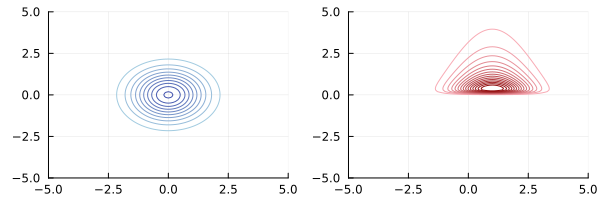

In [5]:
p1 = contour(x, y, (x,y) -> p([x;y]), fill=false, c = :blues, clims=(0,.25), colorbar=false)
p2 = contour(x, y, (x,y) -> q([x;y]), fill=false, c = :reds,  clims=(0,.25), colorbar=false)

l = grid(1, 2, widths  = [0.5,0.5])
plot(p1, p2, layout = l, link=:y,  size=(600,200), ylim=(-5,5))

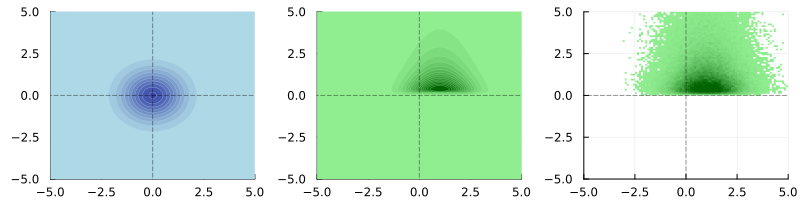

"/Users/mirko/Workspace/prob-comp/Gen-push-forward/imgs/push-forward_2d_example.png"

In [8]:
n = 100_000
Q_samples = hcat([Q(args...) for t=1:n]...)

p1 = contour(x, y, (x,y) -> p([x;y]), fill=true,  c = :blues,  linewidth=0.25, clims=(0,.25), colorbar=false, label=nothing)
vline!([0.0],c=:black, style=:dash, alpha=0.4,label=nothing); hline!([0.0],c=:black, style=:dash, alpha=0.4,label=nothing);
p2 = contour(x, y, (x,y) -> q([x;y]), fill=true , c = :greens, linewidth=0.25, clims=(0,.25), colorbar=false)
vline!([0.0],c=:black, style=:dash, alpha=0.4,label=nothing); hline!([0.0],c=:black, style=:dash, alpha=0.4,label=nothing);
p3 = histogram2d(Q_samples[1,:], Q_samples[2,:], weights=ones(n)./n/dx^2, c=:greens, clims=(0,.2), bins=(x,y), colorbar=false)
vline!([0.0],c=:black, style=:dash, alpha=0.4,label=nothing); hline!([0.0],c=:black, style=:dash, alpha=0.4,label=nothing);

l = grid(1, 3, widths  = [1/3,1/3, 1/3])
myplot = plot(p1, p2, p3, layout = l, link=:y,  size=(800,200), ylim=(-5,5))
display(myplot)
savefig(myplot,"imgs/push-forward_2d_example.png")